<a href="https://colab.research.google.com/github/EAFIT-BI/Business-Analytics---2025-I/blob/main/Aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado

## k-means

In [1]:
# Cargamos las librerías requeridas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
# Generamos el toyset
X, y = make_blobs(n_samples=1000, centers=4,
                  cluster_std=0.6, random_state=0)

array([[-2.00412818,  7.85263232],
       [ 0.67047877,  4.04094275],
       [-2.26367804,  8.27306782],
       ...,
       [-1.18061301,  8.22982063],
       [-1.23690251,  7.78623952],
       [ 3.16502227,  0.76916367]])

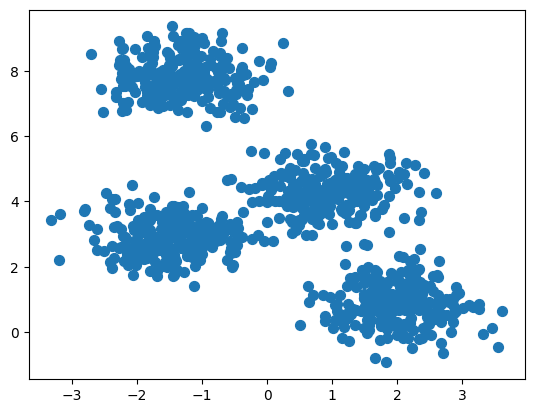

In [6]:
# Graficamos los datos para saber su distribución
plt.scatter(X[:, 0], X[:, 1], s=50);

In [7]:
# Generamos el modelo de agrupamiento
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 2)
# Entrenamos el modelo
modelo.fit(X)
# Generamos la respuesta de los cluster
y_pred = modelo.predict(X)
modelo.inertia_

3760.560202785711

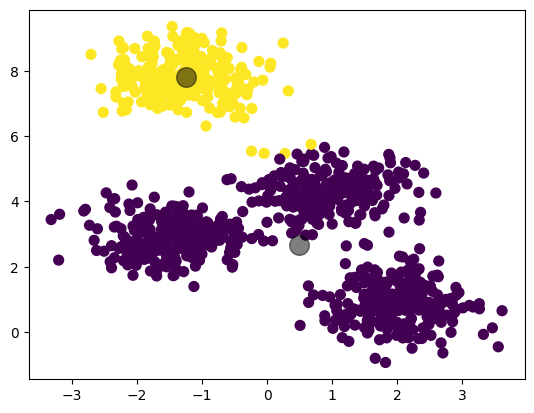

In [8]:
# Graficamos los grupos asignados por el modelo
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

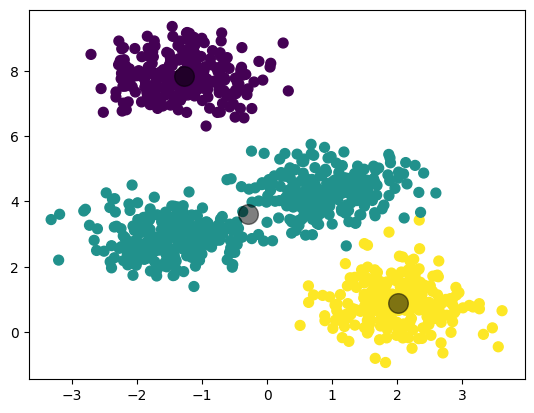

In [9]:
# Hacemos el mismo procedimiento pero con 3 clusters
modelo = KMeans(n_clusters = 3)
modelo.fit(X)
y_pred = modelo.predict(X)
# Graficamos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

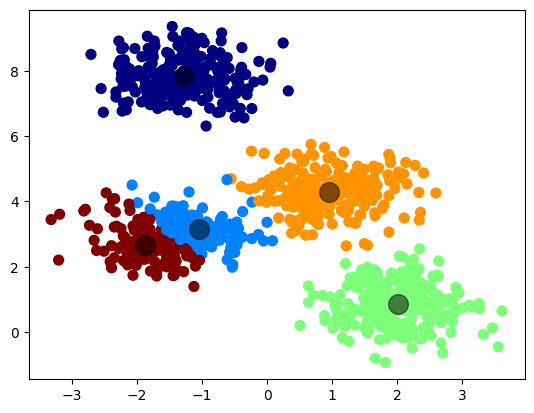

In [16]:
# Hacemos lo mismo pero con 5 clusters
modelo = KMeans(n_clusters = 5)
modelo.fit(X)
y_pred = modelo.predict(X)
# Graficamos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='jet');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

In [17]:
# Con el fin de determinar el mejor número de clusters para
# este conjunto de datos, haremos el gráfico de la métrica de
# inercia

# Definimos el eje x como el número de clusters. En
# este caso haremos un vector desde el 1 hasta el 21
n_clusters = np.arange(1, 21)
# inicializamos la lista de inercias (métrica) vacía
inercias = []
# Hacemos un ciclo que recorra todo el vector de los cluster, desde
# 1 hasta 21
for n in n_clusters:
    # Instanciamos el modelo con n clusters
    modelo = KMeans(n_clusters=n)
    # Entrenamos
    modelo.fit(X)
    # Extraemos el valor de la inercia y lo agregamos a la lista
    inercias.append(modelo.inertia_)

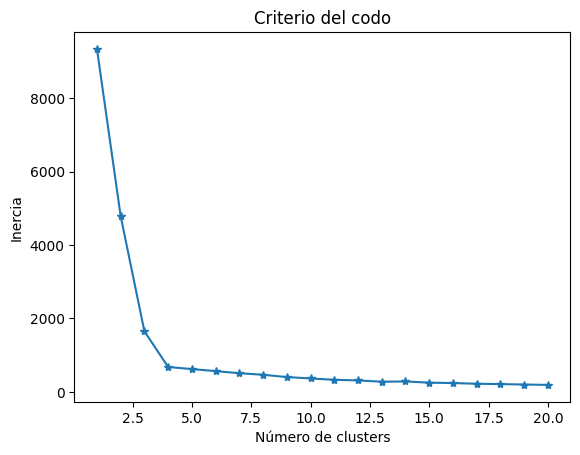

In [19]:
# Graficamos las inercias vs la cantidad de clusters
# para aplicar el "criterio del codo"
plt.plot(n_clusters, inercias, '*-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Criterio del codo')
plt.show()

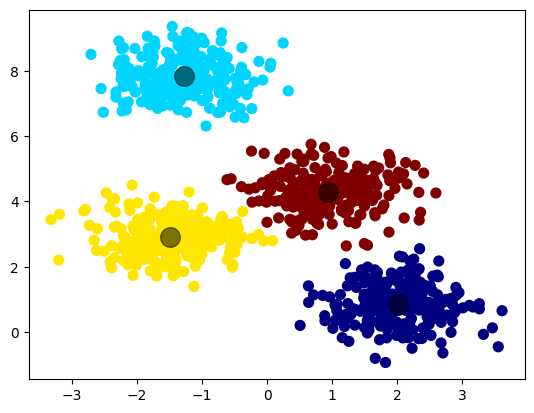

In [22]:
# Dado que la inercia arrojó como resultado que
# el número de clusters debería estar cerca a 4,
# haremos el modelo con este número de grupos
modelo = KMeans(n_clusters = 4)
modelo.fit(X)
y_pred = modelo.predict(X)
# Graficamos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='jet');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

## k-means en conjuntos anisotrópicos

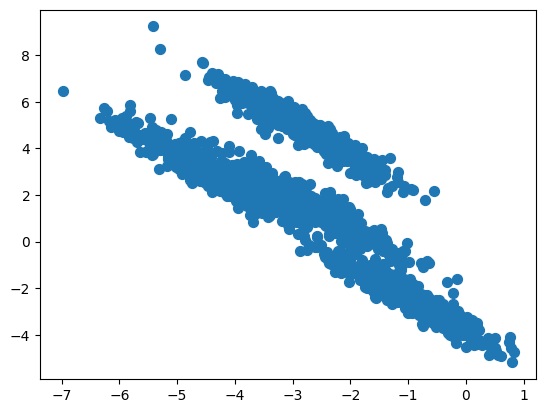

In [24]:
# Generamos el toyset de tal forma que tengamos
# conjuntos o grupos anisotrópicos

# Definimos las transformaciones para que los blobs tengan
# la forma deseada (alargados)
transformaciones = [[0.60834549, -0.63667341],
                    [-0.40887718, 0.85253229]]
X, y = make_blobs(n_samples = 2000, centers = 4, random_state = 1)
# Aplicamos la transformación
X = np.dot(X, transformaciones)
# Graficamos
plt.scatter(X[:,0], X[:,1], s = 50);

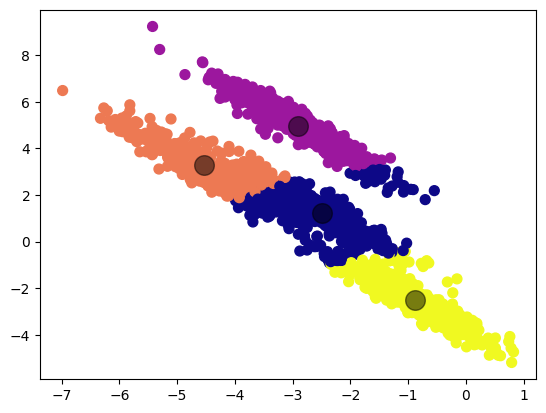

In [26]:
# Vamos a implementar un modelo de kmeans con 4 clusters
modelo = KMeans(n_clusters = 4)
modelo.fit(X)
y_pred = modelo.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

## k-means con conjuntos dispersos (diferentes varianzas)

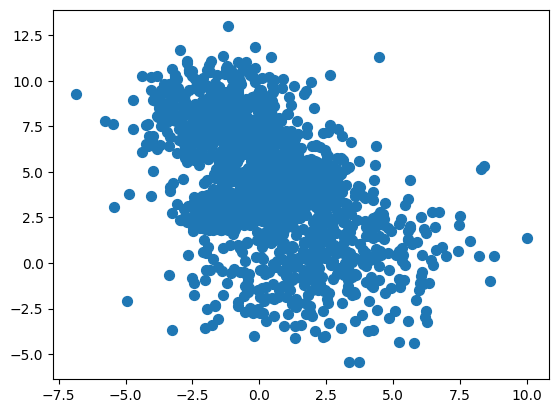

In [27]:
# Hacemos el toyset
X, y = make_blobs(n_samples = 2000, centers=4,
                  cluster_std=[1.0, 2.5, 0.5, 1.5],
                  random_state=0)
# Graficamos
plt.scatter(X[:, 0], X[:, 1], s=50);

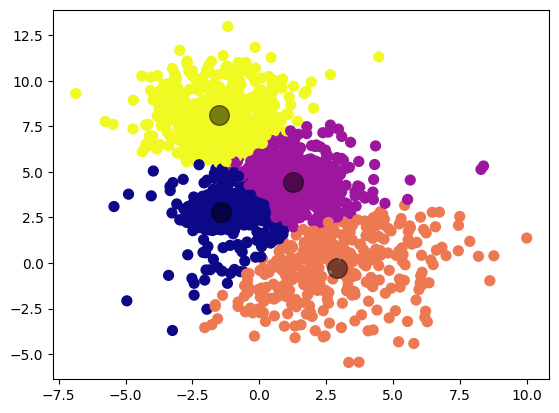

In [28]:
# Observamos cómo se comporta el modelo con 4 clusters
modelo = KMeans(n_clusters = 4)
modelo.fit(X)
y_pred = modelo.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

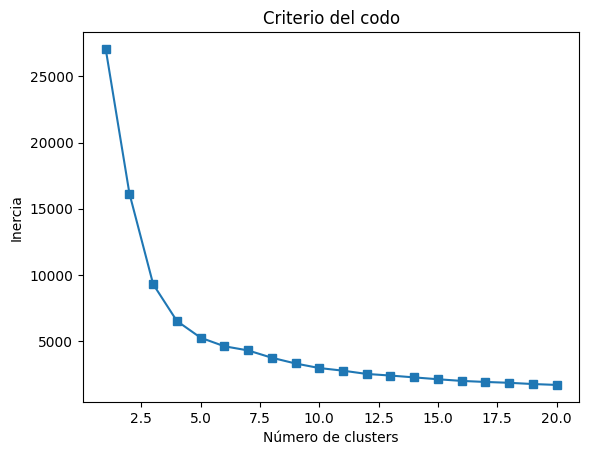

In [29]:
# Dada la dispersión de los datos, calcularemos el gráfico
# de la inercia para encontrar el mejor número de clusters
n_clusters = np.arange(1, 21)
inercias = []
for n in n_clusters:
    modelo = KMeans(n_clusters=n)
    modelo.fit(X)
    inercias.append(modelo.inertia_)

# Graficamos para aplicar el "criterio del codo"
plt.plot(n_clusters, inercias, 's-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Criterio del codo')
plt.show()

## k-means en conjuntos no convexos

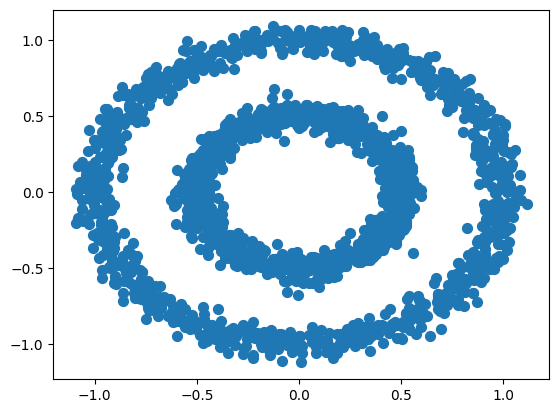

In [38]:
# Generamos el toyset con las características deseadas
# (no convexo)
from sklearn.datasets import make_circles

X, y =  make_circles(n_samples = 2000, factor = 0.5, noise = 0.05)
# Graficamos el toyset
plt.scatter(X[:, 0], X[:, 1], s=50);

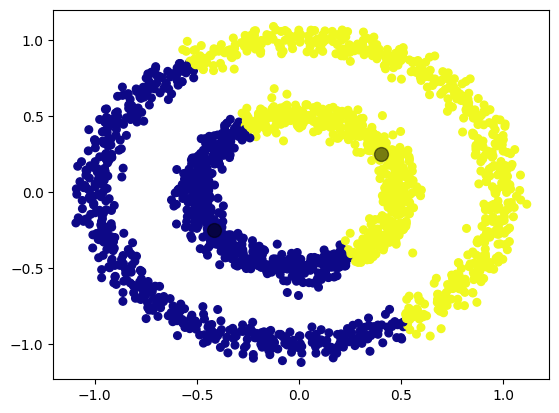

In [44]:
# Implementamos k-means con dos clusters
modelo = KMeans(n_clusters = 2)
modelo.fit(X)
y_pred = modelo.predict(X)
# Graficamos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='plasma');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=100, alpha=0.5);

# Modelos de mezclas Gaussianas

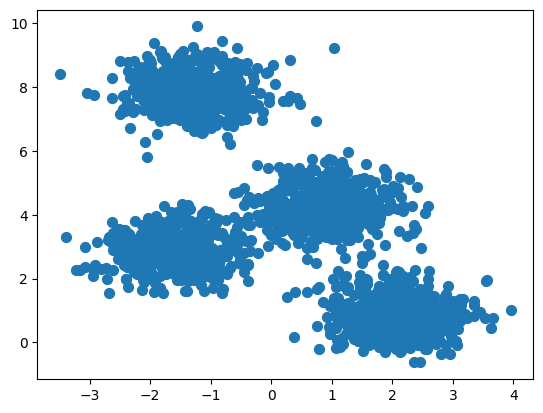

In [46]:
# Generamos el primer toyset (no disperso, convexo  e isotrópico)
X, y = make_blobs(n_samples = 2000, centers = 4, cluster_std = 0.6, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s=50);

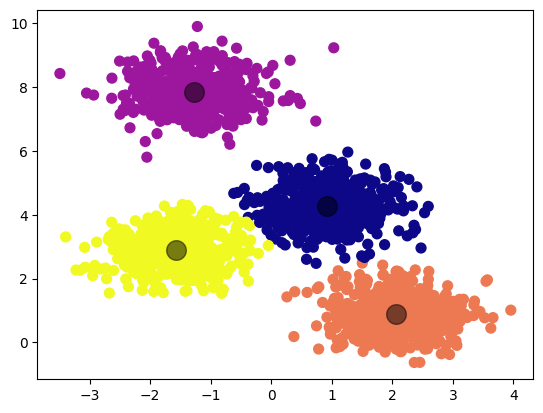

In [47]:
# Instanciamos el modelo de mezclas de gaussianas para este caso
from sklearn.mixture import GaussianMixture

modelo = GaussianMixture(n_components = 4)
modelo.fit(X)
y_pred = modelo.predict(X)

# Graficamos el resultado
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma');
centros = modelo.means_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

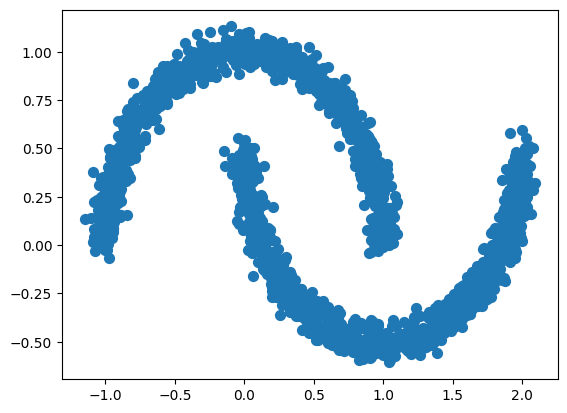

In [48]:
# Compararemos el comportamiento de GMM vs k-means para un conjunto de
# datos no convexo como las lunas
# Generamos los datos
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 2000, noise = 0.05, random_state = 0)

# Graficamos el conjunto de datos
plt.scatter(X[:, 0], X[:, 1], s=50);


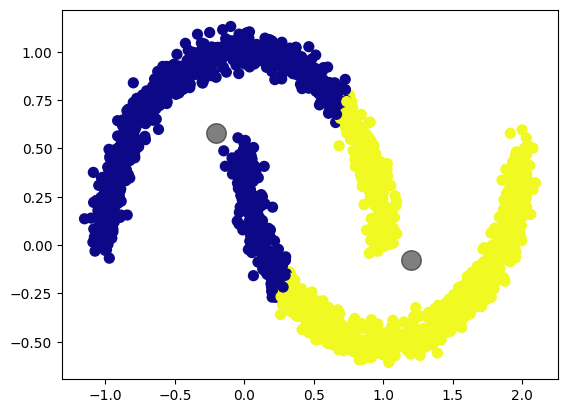

In [49]:
# Primero evaluaremos el comportamiento de k-means
modelo = KMeans(n_clusters = 2)
modelo.fit(X)
y_pred = modelo.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

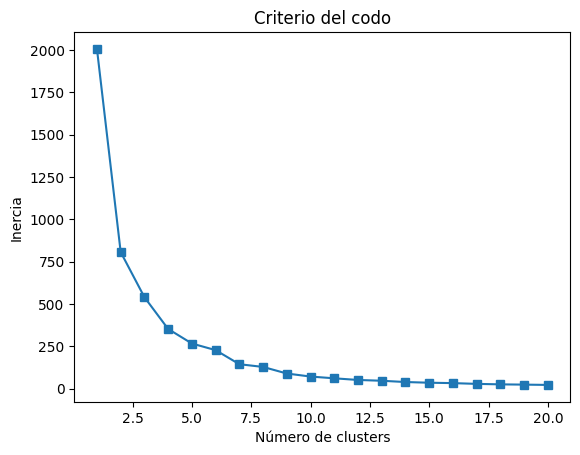

In [51]:
# Revisamos el "criterio del codo" para determinar el mejor número
# de grupos
n_clusters = np.arange(1, 21)
inercias = []
for n in n_clusters:
    modelo = KMeans(n_clusters=n)
    modelo.fit(X)
    inercias.append(modelo.inertia_)
# Graficamos para la selección del número de clusters
plt.plot(n_clusters, inercias, 's-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Criterio del codo')
plt.show()

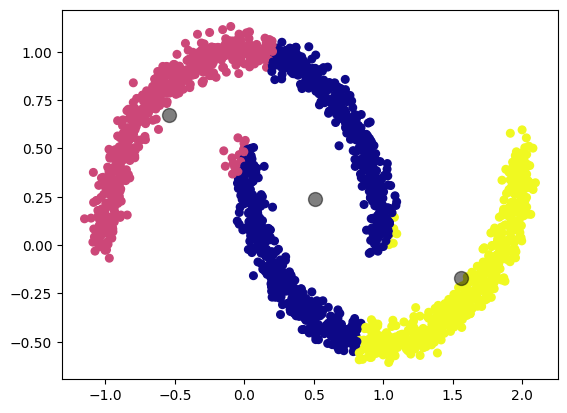

In [52]:
# Según el gráfico anterior, el mejor número es 3 grupos
modelo = KMeans(n_clusters = 3)
modelo.fit(X)
y_pred = modelo.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='plasma');
centros = modelo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=100, alpha=0.5);

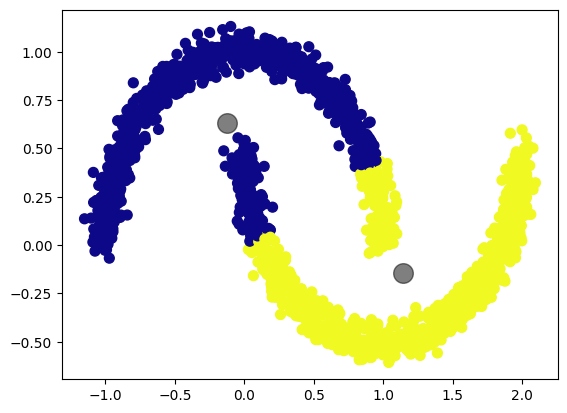

In [53]:
# Ahora miramos el comportamiento de GMM
modelo = GaussianMixture(n_components = 2)
modelo.fit(X)
y_pred = modelo.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma');
centros = modelo.means_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);

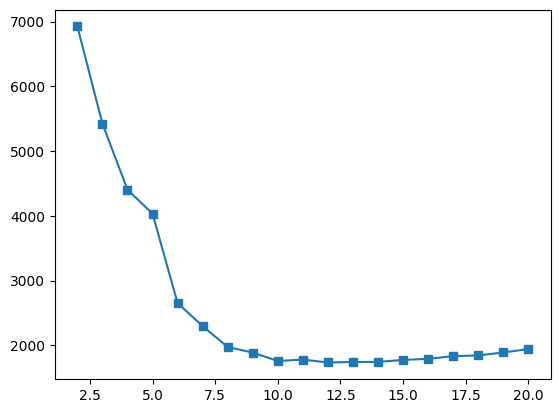

In [58]:
# Para GMM revisaremos la métrica BI y aplicaremos el "criterio del codo"
BIC = []
for i in range(2, 21):
    modelo = GaussianMixture(n_components = i)
    modelo.fit(X)
    BIC.append(modelo.bic(X)) # esta es la métrica BI
# Graficamos
plt.plot(np.arange(2, 21), BIC, 's-');

## GMM para conjuntos anisotrópicos

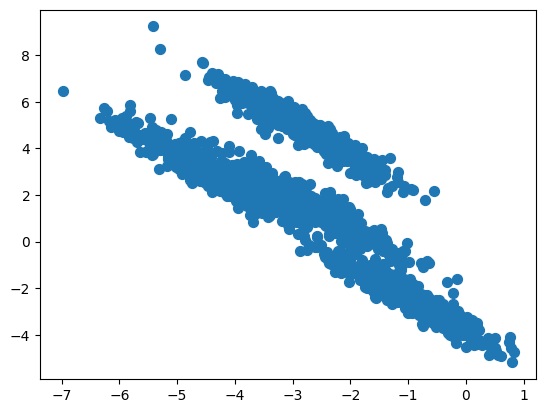

In [59]:
# Generamos los datos
from sklearn.datasets import make_blobs

transformaciones = [[0.60834549, -0.63667341],
                    [-0.40887718, 0.85253229]]
X, y = make_blobs(n_samples = 2000, centers = 4, random_state = 1)
X = np.dot(X, transformaciones)
# Graficamos
plt.scatter(X[:,0], X[:,1], s = 50);

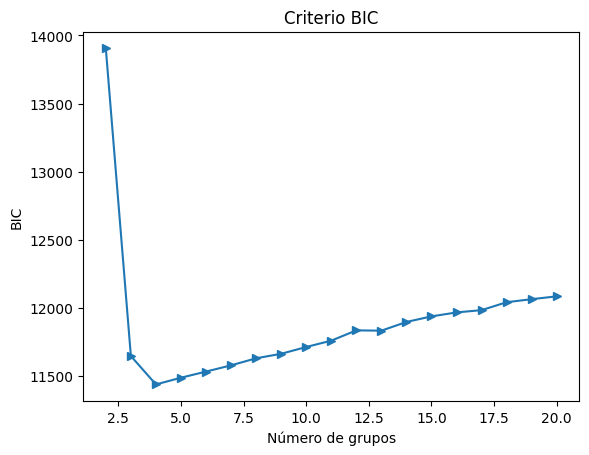

In [61]:
# Revisamos el criterio BIC para determinar el número de gaussianas
BIC = []
for i in range(2, 21):
    modelo = GaussianMixture(n_components = i)
    modelo.fit(X)
    BIC.append(modelo.bic(X))
# Graficamos
plt.plot(range(2, 21), BIC, '>-');
plt.xlabel('Número de grupos')
plt.ylabel('BIC')
plt.title('Criterio BIC');

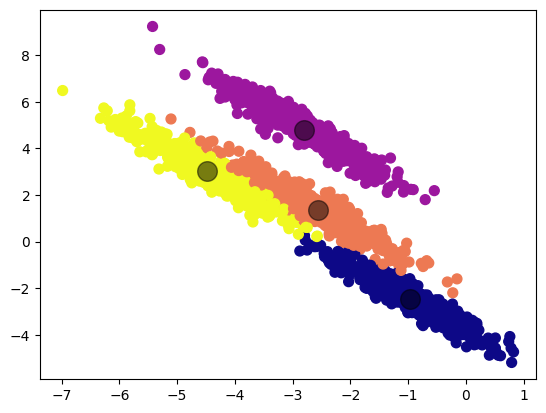

In [62]:
# Según la métrica, necesitamos 4 gaussianas para representar la división
# de los datos
modelo = GaussianMixture(n_components = 4)
modelo.fit(X)
y_pred = modelo.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma');
centros = modelo.means_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);
